In [1]:
from __future__ import print_function

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.models import Sequential,Model

In [4]:
from keras.layers import Dense,Dropout,Flatten,Activation,BatchNormalization,Conv2D,MaxPooling2D

In [5]:
from keras.layers.advanced_activations import ELU

In [6]:
import os

In [7]:
num_classes = 20
img_rows,img_cols = 32,32

In [8]:
batch_size = 16

In [9]:
train_data_dir = './simpsons/train/'
validation_data_dir = './simpsons/validation/'

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_rows,img_cols),class_mode='categorical',batch_size=batch_size)

Found 19548 images belonging to 20 classes.


In [15]:
nb_train_samples = 19548

In [16]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,target_size=(img_rows,img_cols),class_mode='categorical',batch_size=batch_size)

Found 990 images belonging to 20 classes.


In [17]:
nb_validation_samples = 990

In [18]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [19]:
checkpoint = ModelCheckpoint('Simpsons.h5',monitor = 'val_loss',mode='min',save_best_only=True,verbose=1)

In [20]:
early_stopping = EarlyStopping(monitor='val_loss',mode='min',restore_best_weights=True,min_delta=0,patience = 3)

In [21]:
callbacks = [early_stopping,checkpoint]

## Smaller VGG

In [23]:
model = Sequential()

#1st CONV ReLU Layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (img_rows,img_cols,3),activation='relu'))
model.add(BatchNormalization())

#2nd CONV ReLU Layer

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (img_rows,img_cols,3),activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))






model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))




model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
          
          
model.add(Dense(num_classes,activation='softmax'))

          
print(model.summary())




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

## Visualizing Model

In [24]:
%matplotlib inline

from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [35]:
# pip install pydot

In [33]:
# plot_model(model,to_file='LittleVGG.png',show_shapes=True,show_layer_names=True)

In [34]:
# image = mpimg.imread('LittleVGG.png')
# plt.figure(figsize=(100,7))
# imgplot = plt.imshow(image)

### TRAINING MODEL

In [36]:
from keras.optimizers import RMSprop, SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [37]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',min_delta=0.00001,patience=3,factor=0.2,verbose=1)

In [38]:
callbacks.append(reduce_lr)

In [39]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [40]:
epochs = 10

In [42]:
history = model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples//batch_size,callbacks=callbacks)

Epoch 1/10
1221/1221 [==============================] - ETA: 0s - loss: 2.7523 - accuracy: 0.1996
Epoch 00001: val_loss improved from inf to 3.14192, saving model to Simpsons.h5
1221/1221 [==============================] - 394s 323ms/step - loss: 2.7523 - accuracy: 0.1996 - val_loss: 3.1419 - val_accuracy: 0.1404
Epoch 2/10
1221/1221 [==============================] - ETA: 0s - loss: 2.1215 - accuracy: 0.3522
Epoch 00002: val_loss improved from 3.14192 to 1.89299, saving model to Simpsons.h5
1221/1221 [==============================] - 323s 264ms/step - loss: 2.1215 - accuracy: 0.3522 - val_loss: 1.8930 - val_accuracy: 0.4518
Epoch 3/10
1221/1221 [==============================] - ETA: 0s - loss: 1.6881 - accuracy: 0.4924
Epoch 00003: val_loss improved from 1.89299 to 1.50527, saving model to Simpsons.h5
1221/1221 [==============================] - 321s 263ms/step - loss: 1.6881 - accuracy: 0.4924 - val_loss: 1.5053 - val_accuracy: 0.5400
Epoch 4/10
1221/1221 [=========================

In [43]:
logs = history.history

In [46]:
logs

{'loss': [2.7523446083068848,
  2.1215157508850098,
  1.6881327629089355,
  1.4237297773361206,
  1.2395379543304443,
  1.1370264291763306,
  1.0070396661758423,
  0.92286217212677,
  0.8496171832084656,
  0.8139159083366394],
 'accuracy': [0.19962114095687866,
  0.3521912693977356,
  0.4924226999282837,
  0.5805345177650452,
  0.6395658254623413,
  0.6658816337585449,
  0.712369441986084,
  0.7412963509559631,
  0.7629531025886536,
  0.772783100605011],
 'val_loss': [3.141916036605835,
  1.8929874897003174,
  1.50527024269104,
  1.32126784324646,
  5.759088516235352,
  0.9146623611450195,
  0.7443771958351135,
  1.0558358430862427,
  0.5637272596359253,
  0.4019363820552826],
 'val_accuracy': [0.14036884903907776,
  0.4518442749977112,
  0.5399590134620667,
  0.6137295365333557,
  0.13934426009655,
  0.7520492076873779,
  0.7920082211494446,
  0.7213114500045776,
  0.8381147384643555,
  0.8903688788414001],
 'lr': [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]}

In [48]:
import pandas as pd

In [49]:
logs = pd.DataFrame(logs)

In [51]:
logs = logs.drop('lr',axis=1)

In [52]:
logs

,loss,accuracy,val_loss,val_accuracy
0,2.752345,0.199621,3.141916,0.140369
1,2.121516,0.352191,1.892987,0.451844
2,1.688133,0.492423,1.505270,0.539959
3,1.423730,0.580535,1.321268,0.613730
4,1.239538,0.639566,5.759089,0.139344
5,1.137026,0.665882,0.914662,0.752049
6,1.007040,0.712369,0.744377,0.792008
7,0.922862,0.741296,1.055836,0.721311
8,0.849617,0.762953,0.563727,0.838115
9,0.813916,0.772783,0.401936,0.890369


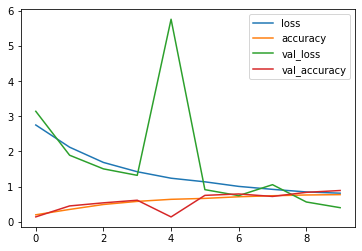

In [53]:
logs.plot()

## Performance Analysis

In [54]:
import matplotlib.pyplot as plt

In [55]:
import sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
import numpy as np

In [57]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,target_size=(img_rows,img_cols),class_mode='categorical',batch_size=batch_size,shuffle=False)

Found 990 images belonging to 20 classes.


In [58]:
class_labels = validation_generator.class_indices

In [59]:
class_labels = {v:k for k,v in class_labels.items()}

In [60]:
class_labels

{0: 'abraham_grampa_simpson',
 1: 'apu_nahasapeemapetilon',
 2: 'bart_simpson',
 3: 'charles_montgomery_burns',
 4: 'chief_wiggum',
 5: 'comic_book_guy',
 6: 'edna_krabappel',
 7: 'homer_simpson',
 8: 'kent_brockman',
 9: 'krusty_the_clown',
 10: 'lenny_leonard',
 11: 'lisa_simpson',
 12: 'marge_simpson',
 13: 'mayor_quimby',
 14: 'milhouse_van_houten',
 15: 'moe_szyslak',
 16: 'ned_flanders',
 17: 'nelson_muntz',
 18: 'principal_skinner',
 19: 'sideshow_bob'}

In [62]:
classes = list(class_labels.values())

In [63]:
classes

['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'comic_book_guy',
 'edna_krabappel',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lisa_simpson',
 'marge_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'principal_skinner',
 'sideshow_bob']

In [64]:
nb_train_samples

19548

In [65]:
Y_pred = model.predict_generator(validation_generator,nb_validation_samples//batch_size+1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [66]:
y_pred = np.argmax(Y_pred,axis=1)

In [67]:
y_pred

array([ 0,  7,  7,  0,  0,  0,  7,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,
        0,  0,  0,  0,  7,  7,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  7,  2,  2,
        2,  2,  7,  2,  7, 11,  2, 18,  7,  2,  2,  2,  2, 18, 18,  2,  2,
        2,  2, 11,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 18, 18,  2,  2,  2,  2,  0,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  7,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,
        3,  3, 11, 15, 11,  3, 19,  3,  3,  4,  4,  4,  4,  4,  4, 15,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [70]:
print("Confusion Matrix")
print(confusion_matrix(validation_generator.classes,y_pred))

Confusion Matrix
[[41  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 38  0  0  0  0  4  0  0  0  2  0  0  0  0  0  0  5  0]
 [ 0  0  0 42  1  0  0  1  0  0  0  2  0  0  0  1  0  0  0  1]
 [ 0  0  0  0 46  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 1  0  0  0  4 34  0  0  0  3  0  0  0  0  0  2  0  1  3  1]
 [ 1  0  0  0  0  1 39  0  1  0  0  0  0  0  0  0  5  0  3  0]
 [ 0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0 44  0  0  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  1  0  2  0  0  0 44  0  0  0  1  1  0  1  0]
 [ 0  1  0  0  0  0  0  2  0  0  0  0 46  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 41  0  5  3  1  0  0]
 [ 0  1  0  0  0  1  0  0  1  0  0  0  2  0 40  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 

In [73]:
print("Classification report")
print(classification_report(validation_generator.classes,y_pred,target_names=classes))

Classification report
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.93      0.85      0.89        48
  apu_nahasapeemapetilon       0.94      1.00      0.97        50
            bart_simpson       1.00      0.76      0.86        50
charles_montgomery_burns       0.98      0.88      0.92        48
            chief_wiggum       0.85      0.92      0.88        50
          comic_book_guy       0.87      0.69      0.77        49
          edna_krabappel       1.00      0.78      0.88        50
           homer_simpson       0.69      0.98      0.81        50
           kent_brockman       0.96      0.98      0.97        50
        krusty_the_clown       0.94      0.98      0.96        50
           lenny_leonard       0.98      0.88      0.93        50
            lisa_simpson       0.92      0.88      0.90        50
           marge_simpson       0.92      0.92      0.92        50
            mayor_quimby       0.95      0.82      0.